In [116]:
import obspy 
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
glob.glob("d:\\python\\1126\\*.SAC")

['d:\\python\\1126\\TW.NACB..BHZ.D.2019.108.045953.SAC',
 'd:\\python\\1126\\TW.SSLB..BHZ.D.2019.108.050002.SAC',
 'd:\\python\\1126\\TW.TPUB..BHZ.D.2019.108.050003.SAC',
 'd:\\python\\1126\\TW.TWGB..BHZ.D.2019.108.045949.SAC',
 'd:\\python\\1126\\TW.YULB..BHZ.D.2019.108.050000.SAC']

In [118]:
taiwan_x=[]
taiwan_y=[]
with open("taiwan.txt","r") as fp:
    res=fp.readlines()
for ii in res:
    tmp = ii.split()
    taiwan_x.append(float(tmp[0]))
    taiwan_y.append(float(tmp[1]))

In [119]:
ff=glob.glob("d:\\python\\1126\\*.SAC")

In [120]:
st_all = obspy.Stream() 
for i in ff:
    st_all = st_all + obspy.read(i)

In [121]:
st1=st_all[0]
st2=st_all[1]
st3=st_all[2]
st4=st_all[3]
st5=st_all[4]

In [122]:
lat1 = st_all[0].stats.sac.stla
lon1 = st_all[0].stats.sac.stlo

lat2 = st_all[1].stats.sac.stla
lon2 = st_all[1].stats.sac.stlo

lat3 = st_all[2].stats.sac.stla
lon3 = st_all[2].stats.sac.stlo

lat4 = st_all[3].stats.sac.stla
lon4 = st_all[3].stats.sac.stlo

lat5 = st_all[4].stats.sac.stla
lon5 = st_all[4].stats.sac.stlo

In [123]:
aa={}
for i in range(5):
    aa[st_all[i].stats.station]=[st_all[i].stats.sac.stla,st_all[i].stats.sac.stlo]

In [124]:
aa

{'NACB': [24.1738, 121.5947],
 'SSLB': [23.7876, 120.954],
 'TPUB': [23.3005, 120.6296],
 'TWGB': [22.8177, 121.0799],
 'YULB': [23.3925, 121.2971]}

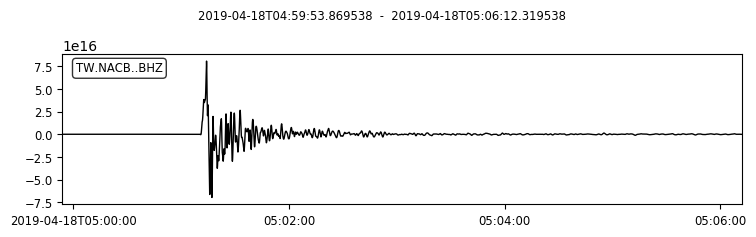

In [125]:
st1.filter('lowpass', freq=1.0, corners=2, zerophase=True)
st1.plot()

In [126]:
st_all[0].stats

         network: TW
         station: NACB
        location: 
         channel: BHZ
       starttime: 2019-04-18T04:59:53.869538Z
         endtime: 2019-04-18T05:06:12.319538Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 7570
           calib: 2508770000.0
         _format: SAC
      processing: ["ObsPy 1.1.0: filter(options={'freq': 1.0, 'corners': 2, 'zerophase': True}::type='lowpass')"]
             sac: AttribDict({'delta': 0.05, 'scale': 2508770000.0, 'b': 0.000538, 'e': 378.45053, 'o': 72.13046, 'stla': 24.1738, 'stlo': 121.5947, 'stel': 215.0, 'stdp': 0.0, 'evla': 23.9888, 'evlo': 121.6934, 'evdp': 20.0, 'dist': 22.80222, 'az': 333.9249, 'baz': 153.88486, 'gcarc': 0.20507437, 'cmpaz': 0.0, 'cmpinc': 0.0, 'nzyear': 2019, 'nzjday': 108, 'nzhour': 4, 'nzmin': 59, 'nzsec': 53, 'nzmsec': 869, 'nvhdr': 6, 'npts': 7570, 'iftype': 1, 'leven': 1, 'kstnm': 'NACB    ', 'kevnm': 'Taiwan          ', 'kcmpnm': 'BHZ     ', 'knetwk': 'TW      ', 'kinst': 'Streckei'})

In [127]:
st_all[0].stats.sac.stla

24.1738

In [128]:
event_lat = st_all[0].stats.sac.evla
event_lon = st_all[0].stats.sac.evlo
print(event_lat,event_lon)

23.9888 121.6934


In [129]:
st_all[0].stats.sac.stlo

121.5947

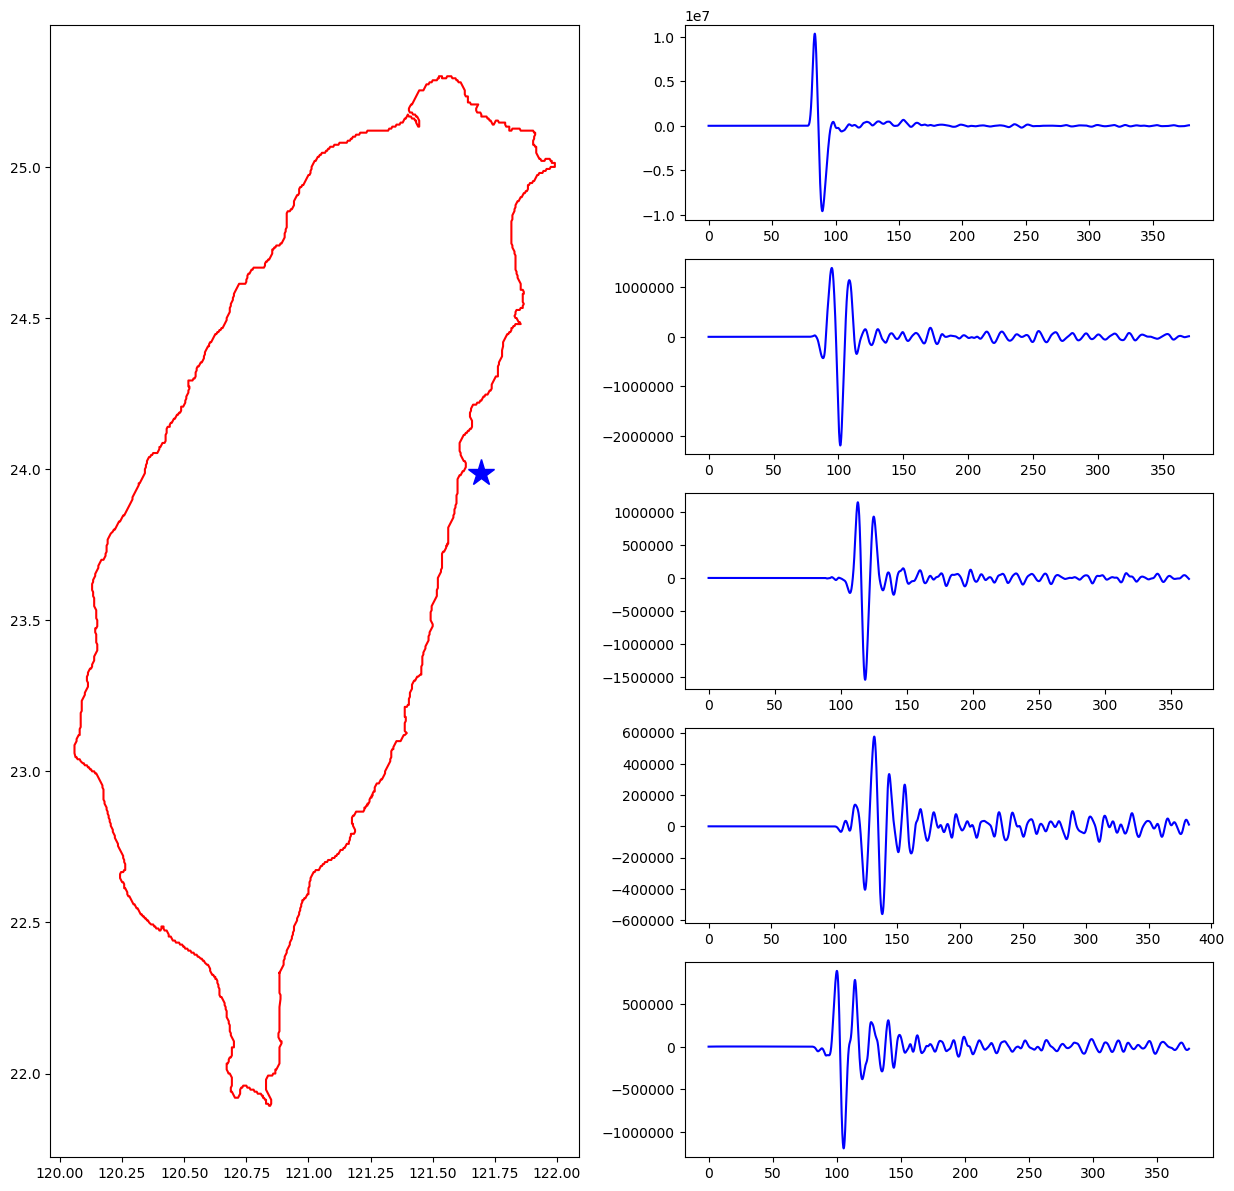

In [130]:
fig = plt.figure(figsize=(15,15), dpi=100) 

plt.subplot(1,2,1)
plt.plot(taiwan_x,taiwan_y,'r-')
plt.plot(event_lon,event_lat,'b*',markersize=20)

num = 2
for i in st_all[0:5]:
    i.filter("lowpass",freq=0.1)
    y = i.data
    x = i.times() 
    
    plt.subplot(5,2,num)
    plt.plot(x,y, color="b")
    
    num = num + 2

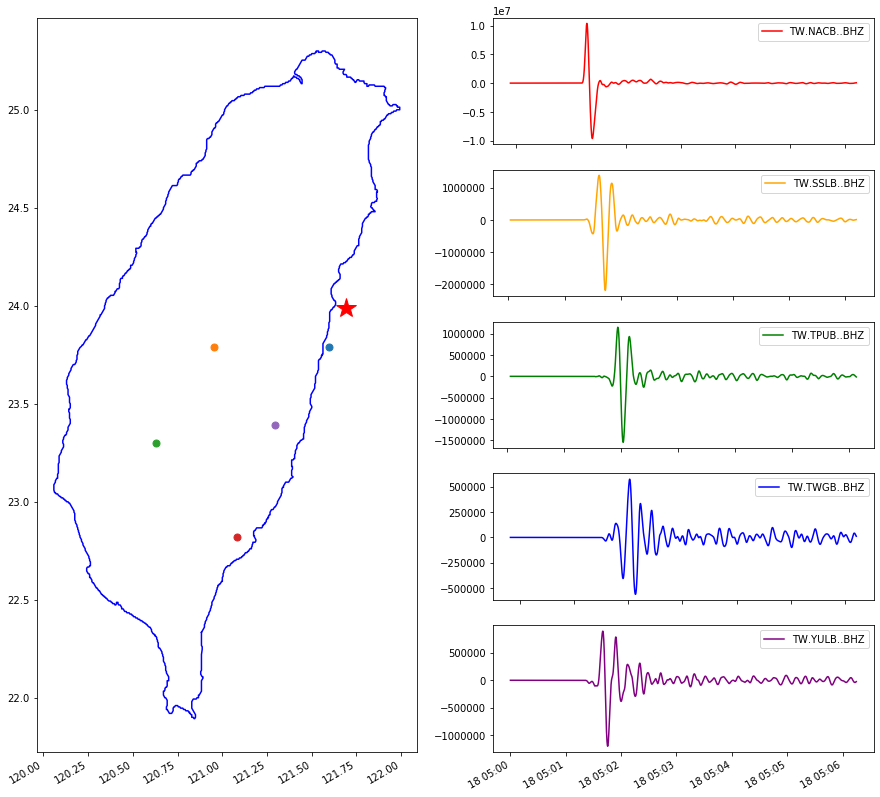

In [132]:
fig = plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.plot(taiwan_x, taiwan_y,"b")
plt.plot(event_lon, event_lat, "r*", markersize=20)
plt.plot(lon1, lat2, "o", markersize=7)
plt.plot(lon2, lat2, "o", markersize=7)
plt.plot(lon3, lat3, "o", markersize=7)
plt.plot(lon4, lat4, "o", markersize=7)
plt.plot(lon5, lat5, "o", markersize=7)

fig.autofmt_xdate()

ax = plt.subplot(5, 2, 2)

ax.plot(st1.times("matplotlib"), st1.data, "r", label="TW.NACB..BHZ")

ax.legend(loc="upper right")

ax.xaxis_date()

fig.autofmt_xdate()

ax = plt.subplot(5, 2, 4)

ax.plot(st2.times("matplotlib"), st2.data, "orange", label="TW.SSLB..BHZ")

ax.legend(loc="upper right")

ax.xaxis_date()

fig.autofmt_xdate()

ax = plt.subplot(5, 2, 6)

ax.plot(st3.times("matplotlib"), st3.data, "g-", label="TW.TPUB..BHZ")

ax.legend(loc="upper right")

ax.xaxis_date()

fig.autofmt_xdate()

ax = plt.subplot(5, 2, 8)

ax.plot(st4.times("matplotlib"), st4.data, "b-", label="TW.TWGB..BHZ")

ax.legend(loc="upper right")

ax.xaxis_date()

fig.autofmt_xdate()

ax = plt.subplot(5, 2, 10)

ax.plot(st5.times("matplotlib"), st5.data, "purple", label="TW.YULB..BHZ")

ax.legend(loc="upper right")

ax.xaxis_date()

fig.autofmt_xdate()
plt.savefig("1126作業-U10710019-王暄昀.png")
plt.show()

In [1]:
type(x)

NameError: name 'x' is not defined